<a href="https://colab.research.google.com/github/vasanth6382/E-Commerce-Website/blob/main/Forecasting_Blended_Fuel_Future_Req_Using_Advanced_RNN_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input
import matplotlib.pyplot as plt


# LOAD THE DATASET

In [4]:
Data_Frame = pd.read_csv('EthanolBlend_FutureForecast_LSTM2024.csv')
print(Data_Frame.head())

         Date  Sugarcane Production (thousand tons)  \
0  2003-01-01                           4223.482361   
1  2003-01-02                           4398.054102   
2  2003-01-03                           5156.777781   
3  2003-01-04                           6422.539261   
4  2003-01-05                           5288.248889   

   Sugar Production (thousand tons)  Ethanol Price (USD/liter)  \
0                       1736.319724                   0.958660   
1                       2150.132781                   1.136658   
2                       2087.491292                   1.084381   
3                       2245.149266                   1.054019   
4                       2250.640554                   1.120544   

   GDP (billion USD)  Inflation Rate (%)  Temperature (°C)  Rainfall (mm)  \
0          10.008330            2.508542         24.664042      90.481335   
1           9.811736            2.599615         22.587991      91.677952   
2           9.876149            2.325899 

In [5]:
print(Data_Frame.tail())

            Date  Sugarcane Production (thousand tons)  \
8031  2024-12-27                           3812.925932   
8032  2024-12-28                           3249.582075   
8033  2024-12-29                           4480.157637   
8034  2024-12-30                           3779.738128   
8035  2024-12-31                           3625.885544   

      Sugar Production (thousand tons)  Ethanol Price (USD/liter)  \
8031                       1842.562830                   0.502050   
8032                       1778.950330                   0.639868   
8033                       1873.887092                   0.801635   
8034                       1703.569458                   0.754315   
8035                       1954.115441                   0.809920   

      GDP (billion USD)  Inflation Rate (%)  Temperature (°C)  Rainfall (mm)  \
8031           9.723089            2.162682         18.849277      86.706941   
8032           9.621391            2.280814         20.943751      69.603766

In [6]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  8036 non-null   object 
 1   Sugarcane Production (thousand tons)  8036 non-null   float64
 2   Sugar Production (thousand tons)      8036 non-null   float64
 3   Ethanol Price (USD/liter)             8036 non-null   float64
 4   GDP (billion USD)                     8036 non-null   float64
 5   Inflation Rate (%)                    8036 non-null   float64
 6   Temperature (°C)                      8036 non-null   float64
 7   Rainfall (mm)                         8036 non-null   float64
 8   Ethanol Demand (thousand m³)          8036 non-null   float64
dtypes: float64(8), object(1)
memory usage: 565.2+ KB


In [7]:
Data_Frame.describe()

,Sugarcane Production (thousand tons),Sugar Production (thousand tons),Ethanol Price (USD/liter),GDP (billion USD),Inflation Rate (%),Temperature (°C),Rainfall (mm),Ethanol Demand (thousand m³)
count,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000
mean,5003.713959,2000.495576,0.999194,9.998728,2.000120,25.003341,100.178516,3651.004699
std,866.325505,289.938161,0.367412,0.406453,0.366746,4.082289,17.331357,378.881194
min,2368.320417,1120.543115,0.209200,8.878051,1.264742,13.319340,40.099584,2595.822080
25%,4344.561576,1790.490363,0.660428,9.668252,1.662877,21.738529,86.821596,3350.519957
50%,5008.097148,2004.496357,0.997293,10.001227,1.997926,24.981148,100.194449,3649.107392
75%,5682.182370,2208.145912,1.339285,10.326972,2.336790,28.301926,113.740134,3958.177098
max,8239.440944,3085.897696,1.821447,11.080029,2.792012,36.770734,153.014441,4855.053936


In [8]:
Data_Frame.shape

(8036, 9)

#Correlation Heatmap

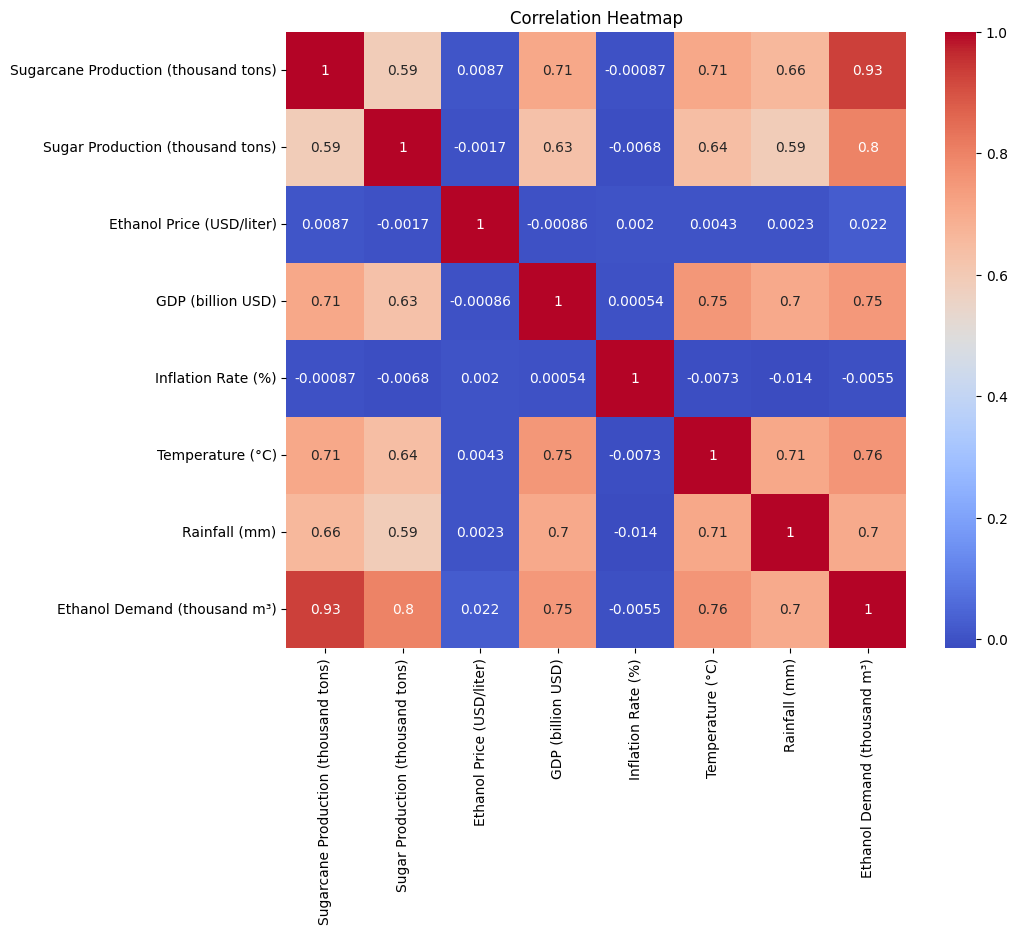

In [15]:
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_data = Data_Frame.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#DATA PREPROCESSING


In [20]:
Data_Frame.bfill(inplace=True)

In [21]:
print(Data_Frame.columns)
# Assuming the relevant column for ethanol demand is 'Ethanol Demand'
Ethanol_data = Data_Frame[['Ethanol Demand (thousand m³)']].dropna()

Index(['Date', 'Sugarcane Production (thousand tons)',
       'Sugar Production (thousand tons)', 'Ethanol Price (USD/liter)',
       'GDP (billion USD)', 'Inflation Rate (%)', 'Temperature (°C)',
       'Rainfall (mm)', 'Ethanol Demand (thousand m³)'],
      dtype='object')


#OUTLIER DETECTION

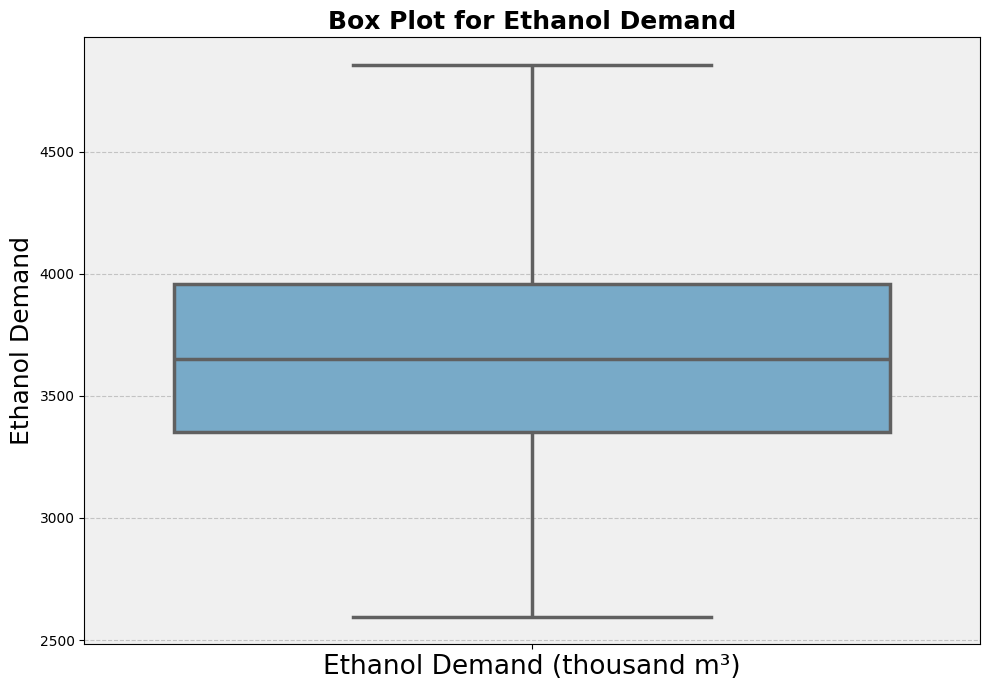

In [24]:
# Box plot for blended Fuel Requirement
plt.figure(figsize=(10, 7))
sns.boxplot(data=Ethanol_data, palette='Blues', linewidth=2.5)
plt.title('Box Plot for Ethanol Demand', fontsize=18, fontweight='bold')
plt.ylabel('Ethanol Demand', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')
plt.xticks(fontsize='19')
plt.tight_layout()
plt.show()

#ETHANOL DEMAND OVER TIME PERIOD

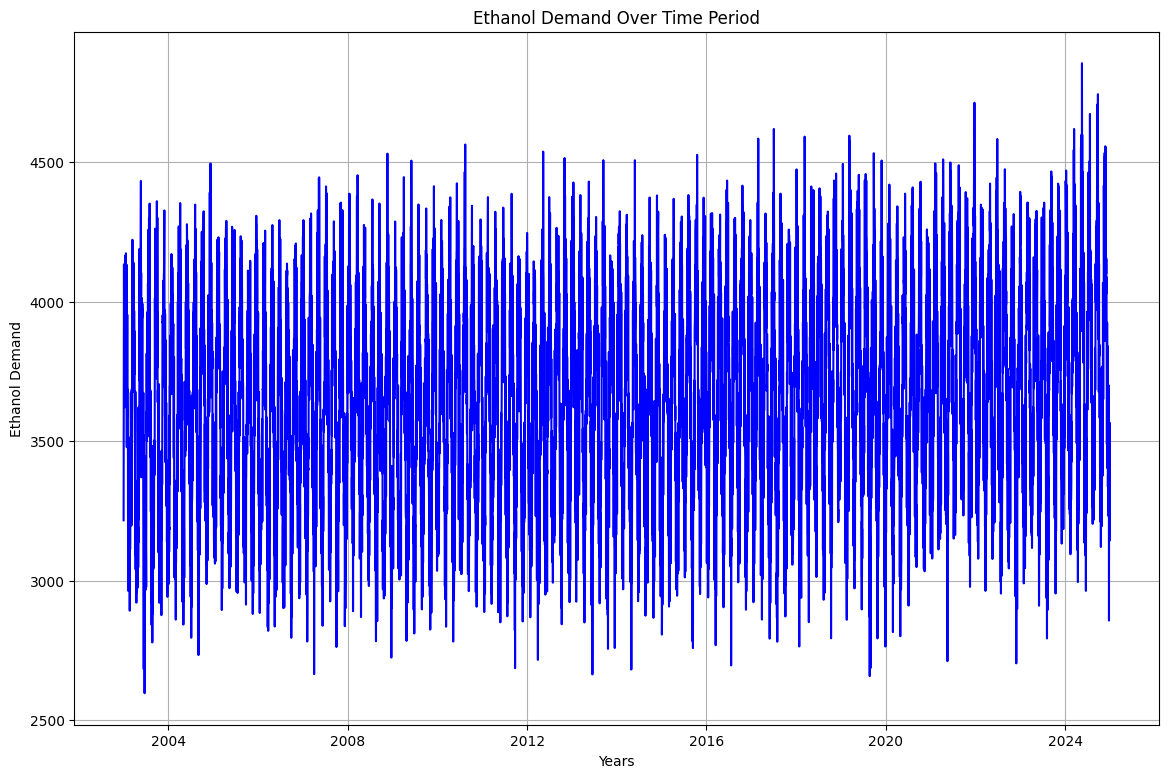

In [27]:
# Plot Ethanol demand over TIME PERIOD
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
Ethanol_data = Data_Frame[['Date', 'Ethanol Demand (thousand m³)']].dropna()
Ethanol_data['Date'] = pd.to_datetime(Ethanol_data['Date'])

# Plot ethanol demand over time
plt.figure(figsize=(14, 9))
plt.plot(Ethanol_data['Date'], Ethanol_data['Ethanol Demand (thousand m³)'], color='blue')
plt.title('Ethanol Demand Over Time Period')
plt.xlabel('Years')
plt.ylabel('Ethanol Demand')
plt.grid(True)
plt.show()


In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import the missing function

Ethanol_Data = Ethanol_data[['Ethanol Demand (thousand m³)']].values
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Scaled_data= scaler.fit_transform(Ethanol_Data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Number of time steps to look back
X, y = create_sequences(Scaled_data, seq_length)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [33]:
_seq_length = 12  # sequence length (1 year)
X, y = create_sequences(Scaled_data, seq_length)

# SPLIT INTO TRAIN AND TEST SETS

In [34]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# BUILD THE LSTM MODEL FOR PREDICTION

In [36]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# TRAIN THE MODEL


In [38]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
5763/5763 - 44s - 8ms/step - loss: 0.0106 - val_loss: 0.0079
Epoch 2/20
5763/5763 - 79s - 14ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 3/20
5763/5763 - 42s - 7ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 4/20
5763/5763 - 79s - 14ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 5/20
5763/5763 - 43s - 7ms/step - loss: 0.0078 - val_loss: 0.0087
Epoch 6/20
5763/5763 - 49s - 8ms/step - loss: 0.0076 - val_loss: 0.0081
Epoch 7/20
5763/5763 - 41s - 7ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 8/20
5763/5763 - 32s - 5ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 9/20
5763/5763 - 41s - 7ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 10/20
5763/5763 - 42s - 7ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 11/20
5763/5763 - 42s - 7ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 12/20
5763/5763 - 44s - 8ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 13/20
5763/5763 - 40s - 7ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 14/20
5763/5763 - 39s - 7ms/step - loss: 0.0074 - va

#FORECASTING FUTURE REQUIREMENTS OF BLENDED FUEL


In [40]:
# Forecasting future data
def predict_future(model, data, seq_length, forecast_steps):
    predictions = []
    input_seq = data[-seq_length:]  # Last sequence for prediction

    for _ in range(forecast_steps):
        prediction = model.predict(input_seq.reshape((1, seq_length, 1)))
        predictions.append(prediction[0, 0])
        # Update the input sequence with the latest prediction
        input_seq = np.append(input_seq[1:], prediction, axis=0)

    return np.array(predictions)

# Number of steps to forecast into the future
forecast_steps = 12  # Forecast for 12 months

# Predict future values
future_predictions = predict_future(model, Scaled_data, seq_length, forecast_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [45]:
future_dates = pd.date_range(start='2024-01-01', periods=120, freq='Y')

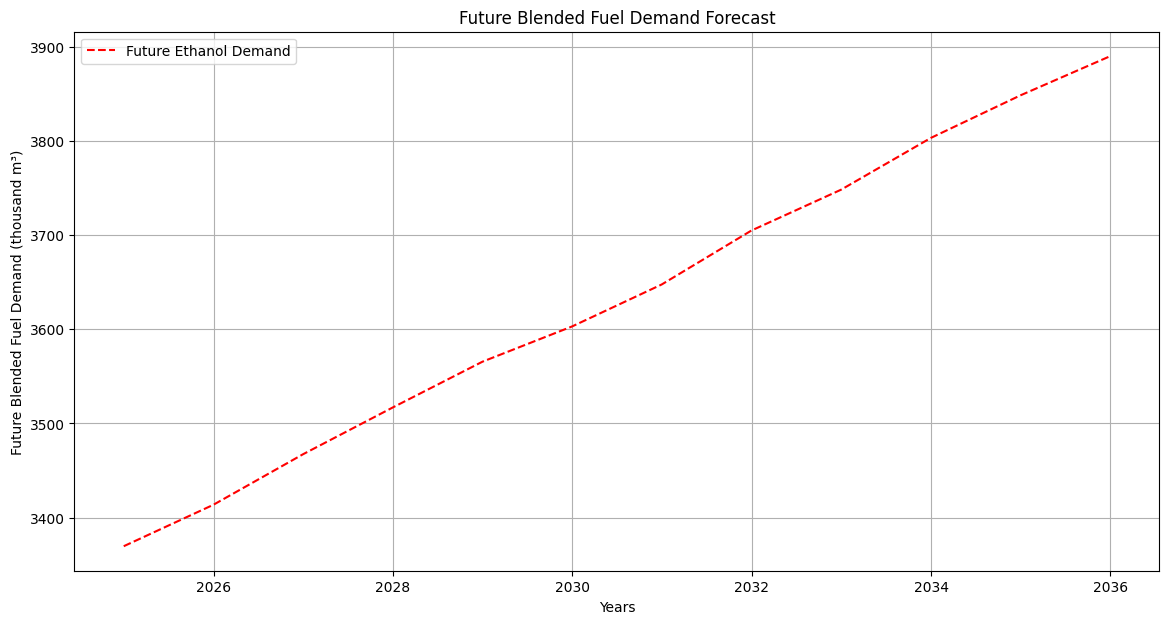

In [48]:
# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates[:len(future_predictions)],
    'Ethanol Demand (thousand m³)': future_predictions.flatten()
})
future_df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Plot future predictions
plt.plot(future_df.index, future_df['Ethanol Demand (thousand m³)'], color='red', linestyle='--', label='Future Ethanol Demand')

plt.title('Future Blended Fuel Demand Forecast')
plt.xlabel('Years')
plt.ylabel('Future Blended Fuel Demand (thousand m³)')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


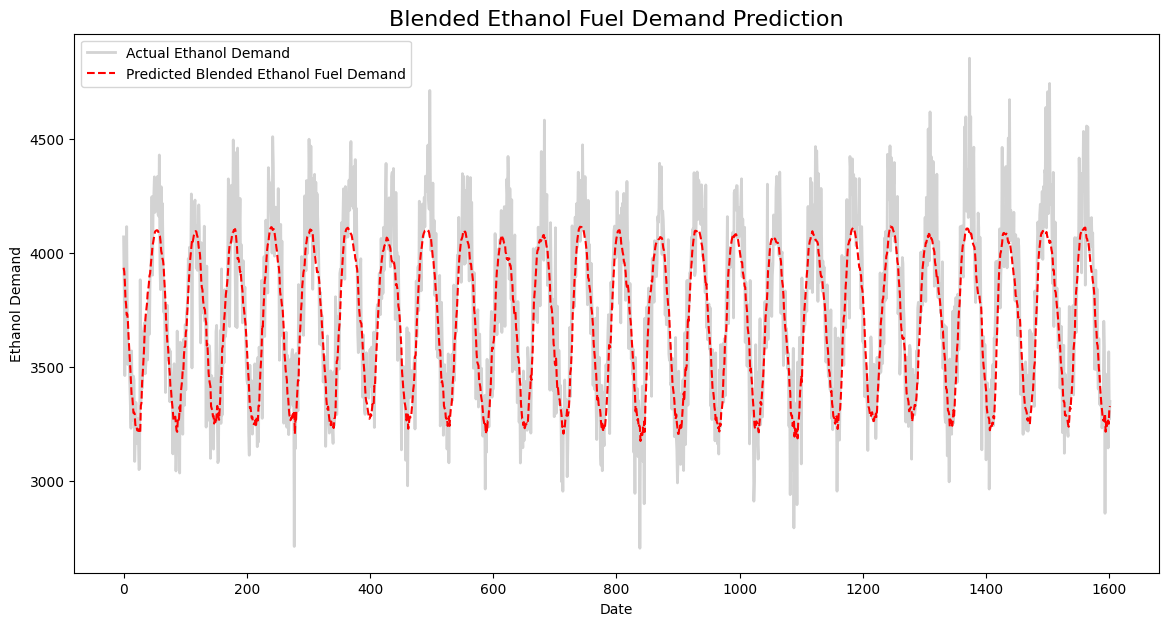

In [52]:
plt.figure(figsize=(14, 7))

# Plot actual ethanol demand
plt.plot(y_test, color='lightgrey', label='Actual Ethanol Demand', linewidth=2)

# Plot predicted ethanol demand
plt.plot(predicted, color='red', label='Predicted Blended Ethanol Fuel Demand', linestyle='--')

# Enhancements
plt.title('Blended Ethanol Fuel Demand Prediction', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Ethanol Demand')
plt.legend()
plt.show()


#RESIDUAL PLOT

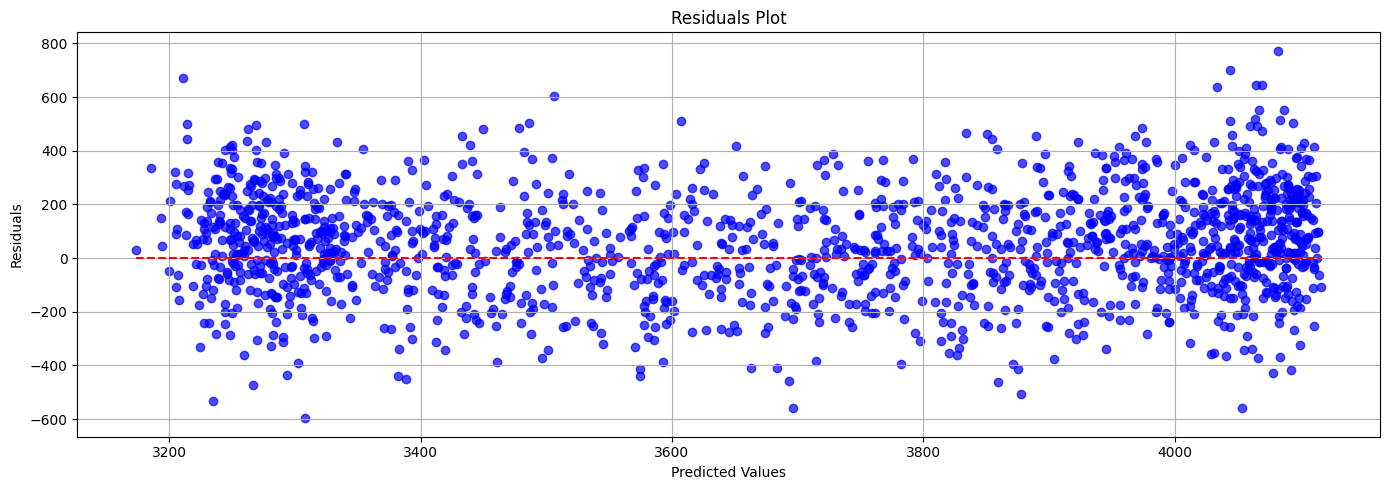

In [53]:
# Calculate residuals
residuals = y_test - predicted

# Residual plot
plt.figure(figsize=(14, 5))
plt.scatter(predicted, residuals, color='blue', alpha=0.7)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors='red', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#PREDICTED vs. ACTUAL SCATTER PLOT

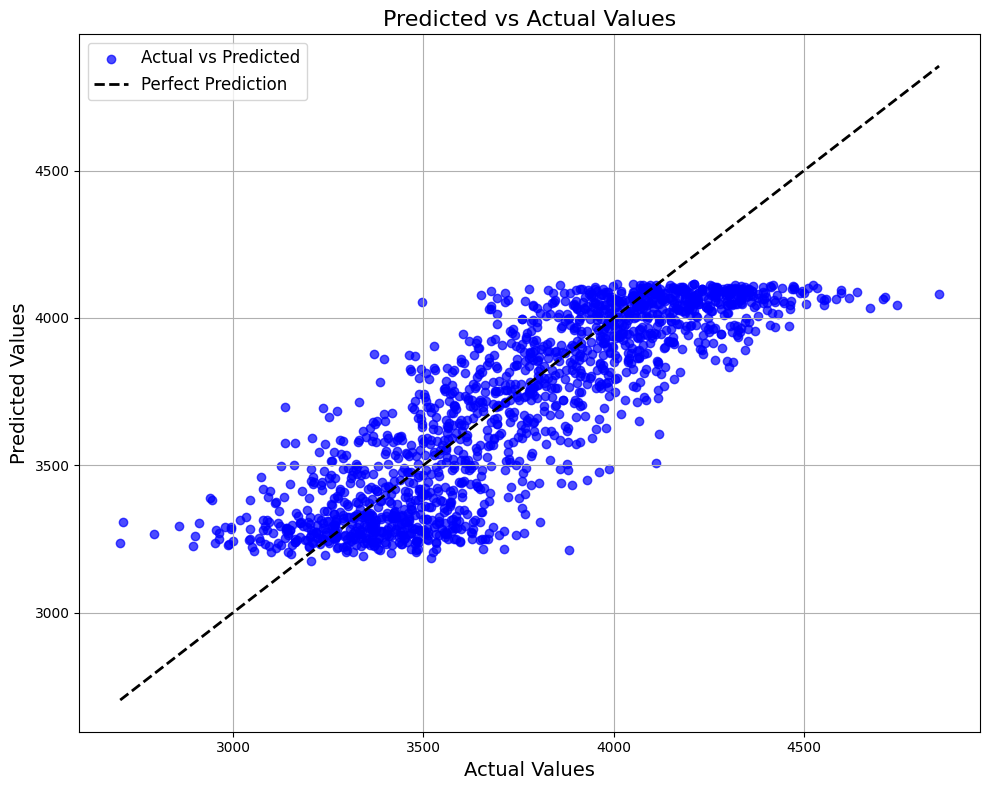

In [54]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predicted, color='blue', alpha=0.7, label='Actual vs Predicted')

# Plotting the diagonal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Enhancements
plt.title('Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#MODEL LOSS OVER EPOCHS


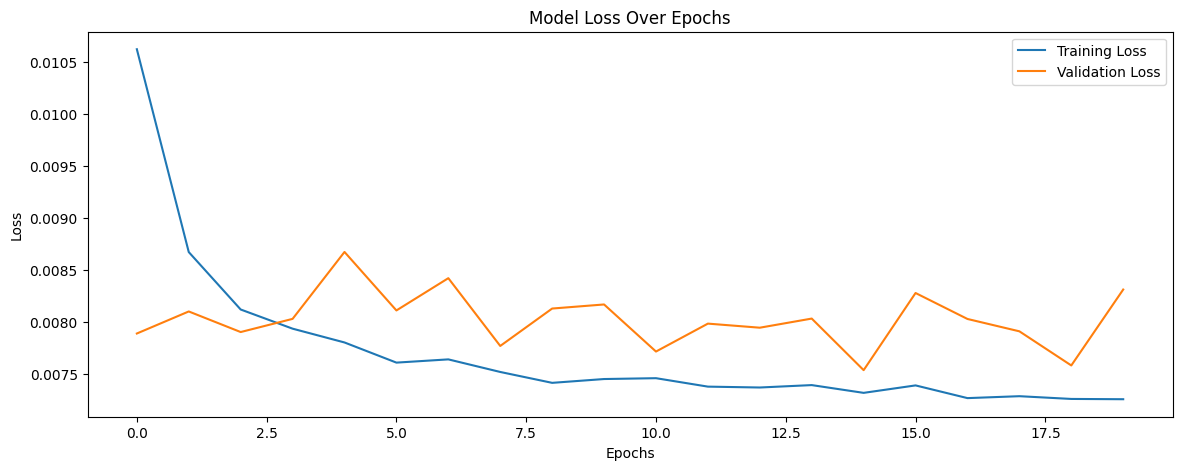

In [55]:
# Plot training and validation loss over epochs
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MODEL PERFORAMNCE METRICS

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predicted)
print('MAE:', mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:', rmse)

# Calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Create a mask for non-zero values
    non_zero_mask = y_true != 0
    if np.any(non_zero_mask):
        return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        return np.nan

mape = mean_absolute_percentage_error(y_test, predicted)
print('MAPE:', mape)

MAE: 160.85218632423005
RMSE: 201.93293115848127
MAPE: 4.2798459947698015


# COMPARING TRADITIONAL METHOD (ARIMA) WITH ADVANCED RNN TECHNIQUE (LSTM ALGORITHM)

ARIMA Model Evaluation:
MAE: 7552517.77325193
RMSE: 7552517.811817732
MAPE: 203391.5971778588


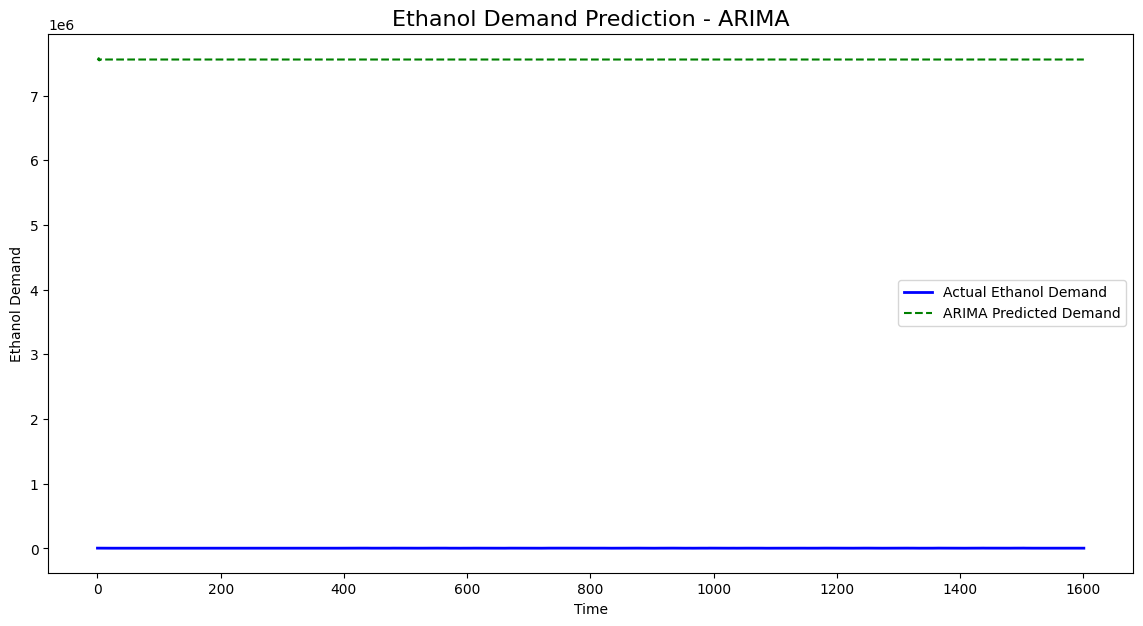

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'Ethanol Production' is the target column for prediction
target_column = 'Ethanol Demand (thousand m³)'
# Extract the univariate time series for Ethanol Production
univariate_data = Ethanol_data[target_column]

model_arima = ARIMA(univariate_data, order=(5, 1, 0))
model_fit = model_arima.fit()

predictions_arima = model_fit.predict(start=len(Ethanol_data), end=len(Ethanol_data) + len(y_test) - 1)
# Convert the Series object to a NumPy array and then reshape
predictions_arima = predictions_arima.values.reshape(-1, 1)
predictions_arima = scaler.inverse_transform(predictions_arima)


mae_arima = mean_absolute_error(y_test, predictions_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, predictions_arima))
mape_arima = mean_absolute_percentage_error(y_test, predictions_arima)

print('ARIMA Model Evaluation:')
print('MAE:', mae_arima)
print('RMSE:', rmse_arima)
print('MAPE:', mape_arima)

plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Ethanol Demand', linewidth=2)
plt.plot(predictions_arima, color='green', label='ARIMA Predicted Demand', linestyle='--')
plt.title('Ethanol Demand Prediction - ARIMA', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Ethanol Demand')
plt.legend()
plt.show()


#PERFORMANCE COMPARISON


In [61]:
print('ARIMA Model Evaluation:')
print('MAE:', mae_arima)
print('RMSE:', rmse_arima)
print('MAPE:', mape_arima)

print('LSTM Model Evaluation:')
print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

# Compare models
def compare_models(mae_arima, rmse_arima, mape_arima, mae, rmse, mape):
    print('\nComparison of ARIMA and LSTM Models:')

    if mae < mae_arima:
        print('LSTM has a lower MAE than ARIMA.')
    else:
        print('ARIMA has a lower MAE than LSTM.')

    if rmse < rmse_arima:
        print('LSTM has a lower RMSE than ARIMA.')
    else:
        print('ARIMA has a lower RMSE than LSTM.')

    if mape < mape_arima:
        print('LSTM has a lower MAPE than ARIMA.')
    else:
        print('ARIMA has a lower MAPE than LSTM.')

# Call the comparison function
compare_models(mae_arima, rmse_arima, mape_arima, mae, rmse, mape)

ARIMA Model Evaluation:
MAE: 7552517.77325193
RMSE: 7552517.811817732
MAPE: 203391.5971778588
LSTM Model Evaluation:
MAE: 160.85218632423005
RMSE: 201.93293115848127
MAPE: 4.2798459947698015

Comparison of ARIMA and LSTM Models:
LSTM has a lower MAE than ARIMA.
LSTM has a lower RMSE than ARIMA.
LSTM has a lower MAPE than ARIMA.


Therefore, LSTM model Performed Well Than ARIMA model Prediction